In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
bio = pd.read_csv('../Data/clean_biodiversity.csv')

In [4]:
bio.head() #already sum the groupby

,Country,System,1990,1991,1992,1993,1994,1995,1996,1997,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Albania,Freshwater,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Terrestrial,1507.0,NaN,NaN,NaN,NaN,4.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,Freshwater,13.0,NaN,210.0,86.00,17.0,1053.00,2.00,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,Terrestrial,NaN,NaN,210.0,86.00,17.0,1053.00,2.00,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Terrestrial,NaN,NaN,NaN,114.54,215.8,252.19,288.59,290.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
bio2 = pd.read_csv('../Data/clean_biodiversity_nogroupby.csv')
bio2.head()

,Unnamed: 0,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,4,sechellarum,Seychelles magpie robin,Seychelles,Africa,-4.58333,55.93333,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6,ochropectus,Djibouti francolin,Djibouti,Africa,11.76667,42.65806,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,7,coprotheres,Cape griffon / Cape vulture,Botswana,Africa,-22.00000,24.00000,Terrestrial,Individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,8,coprotheres,Cape griffon / Cape vulture,Lesotho,Africa,-29.50000,28.25000,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9,coprotheres,Cape griffon / Cape vulture,Mozambique,Africa,-18.25000,35.00000,Terrestrial,Number of individuals,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bio2.count() #data start to be larger in 1990, should we start from there? and stop in 2006?

Unnamed: 0     3235
ID             3235
Species        3235
Common_name    3235
Country        3235
Region         3235
Latitude       3235
Longitude      3235
System         3235
Units          3235
1950             27
1951             18
1952             19
1953             24
1954             23
1955             25
1956             31
1957             33
1958             35
1959             62
1960             59
1961             89
1962            105
1963             79
1964             87
1965            152
1966            109
1967            133
1968            132
1969            136
               ... 
1986            635
1987            663
1988            640
1989            787
1990            909
1991            885
1992            910
1993            940
1994           1005
1995           1041
1996           1093
1997           1145
1998           1070
1999           1141
2000           1209
2001           1036
2002           1005
2003            940
2004            920


In [11]:
#looking through to see complete dataset

#1967 to 2004 African elephant	South Africa
#cantans	Laysan finch	United States

bio1970_2004 = bio2.loc[:,'1967':'2004'] 
bioheaders = bio2.loc[:,'ID':'Units']
bio3 = bioheaders.join(bio1970_2004)
bio3.head()

#get more data
bio1974_2002 = bio2.loc[:,'1974':'2002']
bioheaders = bio2.loc[:,'ID':'Units']
bio4 = bioheaders.join(bio1974_2002)
bio4.head()

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
0,4,sechellarum,Seychelles magpie robin,Seychelles,Africa,-4.58333,55.93333,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,ochropectus,Djibouti francolin,Djibouti,Africa,11.76667,42.65806,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,750.0,NaN,NaN,NaN,NaN
2,7,coprotheres,Cape griffon / Cape vulture,Botswana,Africa,-22.00000,24.00000,Terrestrial,Individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,704.0,NaN,NaN
3,8,coprotheres,Cape griffon / Cape vulture,Lesotho,Africa,-29.50000,28.25000,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,815.0,NaN,NaN
4,9,coprotheres,Cape griffon / Cape vulture,Mozambique,Africa,-18.25000,35.00000,Terrestrial,Number of individuals,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [12]:
#bio1970_2004 = bio1970_2004.dropna().count()
bio3.dropna(inplace=True)
bio3.head()

bio4.dropna(inplace=True)
bio4.head(20)

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1974,...,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002
74,111,africana,African elephant,South Africa,Africa,-23.83333,31.50000,Terrestrial,Individuals,7800.0,...,7600.0,7900.0,8100.0,8300.0,8300.0,9000.0,9300.0,8500.0,9400.0,10500.0
441,1171,acuta,Common pintail / Northern pintail,France,Europe,51.79000,2.76167,Freshwater,Population estimate,52973.0,...,44467.0,47878.0,56862.0,52399.0,56549.0,37513.0,58240.0,52269.0,54707.0,71279.0
442,1172,acuta,Common pintail / Northern pintail,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,893.0,...,557.0,666.0,699.0,1935.0,890.0,1391.0,1041.0,954.0,1536.0,2104.0
445,1176,clypeata,Northern shoveler,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,563.0,...,959.0,1303.0,1253.0,1933.0,2207.0,1419.0,1704.0,1428.0,1648.0,1204.0
448,1179,crecca,Common teal / Green-winged teal,France,Europe,51.79000,2.76167,Freshwater,Population estimate,165982.0,...,253709.0,281561.0,348371.0,322939.0,250732.0,282381.0,347012.0,346010.0,416927.0,402369.0
449,1180,crecca,Common teal / Green-winged teal,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,22063.0,...,18155.0,21193.0,20282.0,29859.0,15245.0,37214.0,34804.0,21142.0,28275.0,19409.0
454,1187,penelope,Eurasian wigeon,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,783.0,...,1925.0,4502.0,3702.0,3670.0,2785.0,4374.0,4413.0,4501.0,5700.0,6270.0
455,1188,penelope,Eurasian wigeon,France,Europe,51.79000,2.76167,Freshwater,Population estimate,551065.0,...,1224774.0,1421683.0,1656692.0,1461205.0,1187283.0,1350289.0,1410905.0,1279673.0,1568491.0,1488345.0
457,1191,platyrhynchos,Mallard / Common mallard,France,Europe,50.06000,6.67000,Freshwater,Population estimate,1068197.0,...,1282520.0,1219065.0,1166972.0,1006951.0,924568.0,995978.0,1171622.0,1109433.0,1236423.0,1224456.0
459,1193,platyrhynchos,Mallard / Common mallard,Austria,Europe,48.76972,13.83417,Freshwater,Population estimate,886546.0,...,519100.0,500011.0,470688.0,502203.0,373760.0,453141.0,552710.0,487965.0,508661.0,523232.0


In [36]:
#Canada
Canada = bio3[bio3['Country'] == 'Canada']
Canada.head()

#specific species
canadasalmon = Canada[Canada['Common_name'] == 'Chinook salmon']
canadasalmon.head()

,ID,Species,Common_name,Country,Region,Latitude,Longitude,System,Units,1967,...,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004
1267,5808,tshawytscha,Chinook salmon,Canada,North America,60.66194,-135.02889,Freshwater,number of fish,414.0,...,2103.0,2958.0,2084.0,777.0,1118.0,677.0,988.0,605.0,1443.0,1989.0


In [57]:
#melt
c = np.arange(1967,2004,1)
c = c.tolist()
c = map(str,c)
print(c)

canadasalmonmelt = pd.melt(canadasalmon, id_vars='Country', value_vars=c)
canadasalmonmelt.head(10)

,Country,variable,value
0,Canada,1967,414.0
1,Canada,1968,334.0
2,Canada,1969,625.0
3,Canada,1970,625.0
4,Canada,1971,856.0
5,Canada,1972,391.0
6,Canada,1973,224.0
7,Canada,1974,273.0
8,Canada,1975,313.0
9,Canada,1976,121.0


([<matplotlib.axis.XTick at 0x1a18826a90>,
 <a list of 37 Text xticklabel objects>)

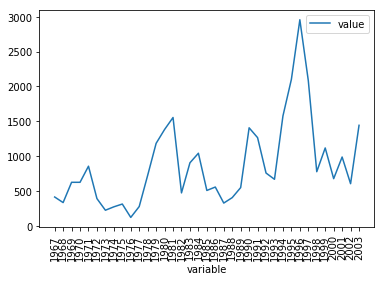

In [51]:
#plotting salmon in canda from 1967 to 2004
#canadasalmonmelt.set_index('variable', inplace=True)
canadasalmonmelt.plot()
plt.xticks(np.arange(0,37,1),np.arange(1967,2005,1),rotation=90)

In [ ]:
#Canada good country
Canada, United Kingdom, United States, Slovakia, Norway, Tanzania, South Africa

#added data if reduced time 1974-2002
France,Denmark,Austria

([<matplotlib.axis.XTick at 0x11418a5f8>,
 <a list of 29 Text xticklabel objects>)

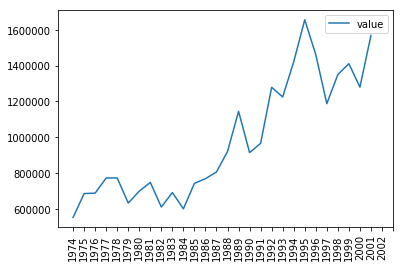

In [18]:
#France
France = bio4[bio4['Country'] == 'France']
France.head()

#specific species
francepenelope = France[France['Species'] == 'penelope']
francepenelope.head()

c = np.arange(1974,2002,1)
c = c.tolist()
c = map(str,c)
print(c)

francepenelopemelt = pd.melt(francepenelope, id_vars='Country', value_vars=c)
francepenelopemelt.head(10)
francepenelopemelt.plot()
plt.xticks(np.arange(0,30,1),np.arange(1974,2003,1),rotation=90)